In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline  
house_df = pd.read_csv('/home/user/Pulpit/pani_ela_data_science/temat2/kc_house_data/kc_house_data.csv')

## 1. Linear Regression. A bit of formalism

Let's have a data consisting of $n$ samples. These samples are $(m+1)$ - dimensional vectors, where first $m$ dimensions are called features (explanatory variables) and will be used to predict the last dimension which is called regressand (dependent variable). 

We will have therefore a $n \times m$ matrix **$X$** (called feature matrix) and vector **$y$** of lenght $n$. 

In our simple example, living squarefeet is a feature, house's price is regressand and the data consists of $100$ samples. It forms $100 \times 1$ feature matrix **$X$** and vector **$y$** of length $100$.

In [26]:
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]
print(np.shape(X))
print(np.shape(y))

(100, 1)
(100, 1)


Linear regression approach tries to find a vector **$b$** which minimizes the cost function 

$$f_{y}(b) = \dfrac{|Xb - y|^2}{n}, $$

where **$|\cdot|$** is euclidean norm and **$Xb$** is simple matrix multiplication (vector is also a matrix). 

Geometrically (and roughly) speaking, we are determining a line which minimizes the cumulative distance to all the points. 

When such a vector **$b$** is found, we can predict values **$y$** for given features **$X$** by calculating **$Xb$**. We have therefore 

$$y_{pred} = Xb, \\ f_{y}(b) = \dfrac{|y_{pred} - y|^2}{n}. $$

## Exercise 1
a) Create functions *predict(b, X)* and *cost(y_pred, y_true)* implementing theory above.  All inputs should be numpy arrays (take care of dimension scalability!)  
b) For our data **$X,y$**, plot cost as the function of **$b$** (which is one dimensional vector). Plot the line with best slope among  evaluated with *cost* function.

In [27]:
#a)
def predict(b, X):
    return np.dot(X,b)

def cost(y_pred, y_true):
    n = len(y_true)
    return (sum((abs(y_pred - y_true)**2))/n)[0]



#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))

[[ 6]
 [11]
 [12]
 [16]]
82.75


<Figure size 576x360 with 0 Axes>

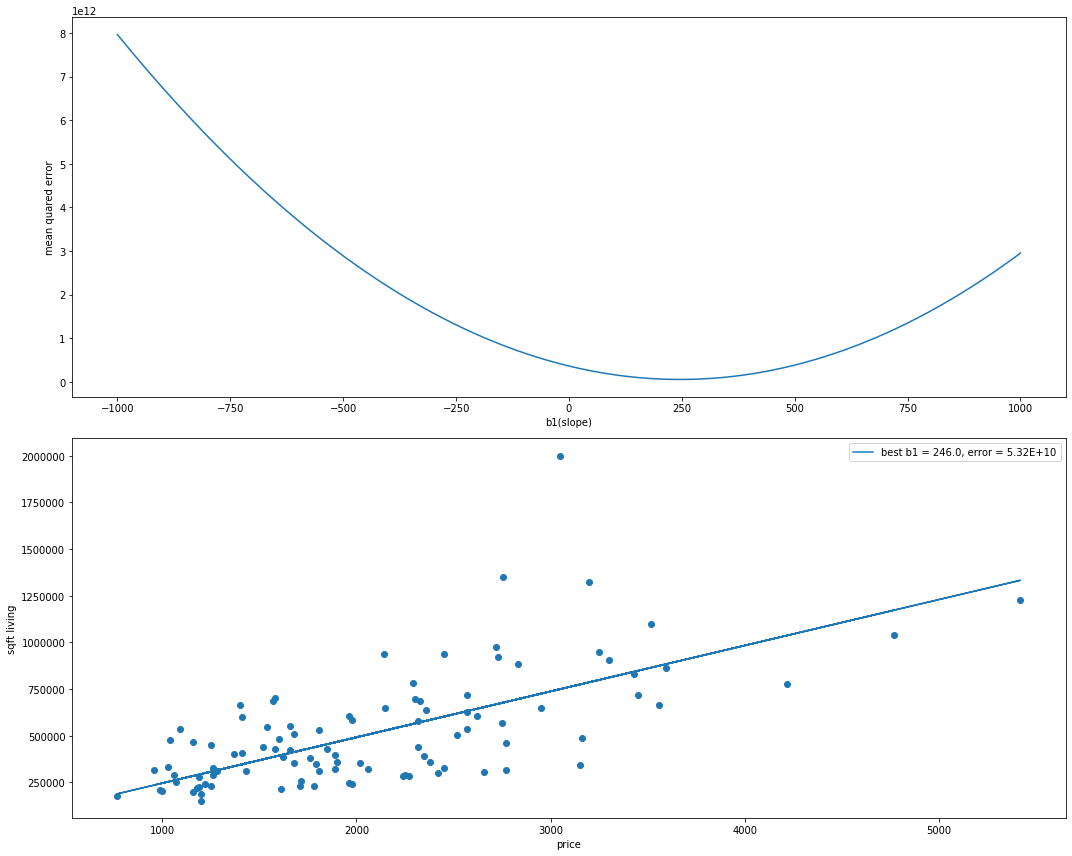

In [33]:
#b)
from numpy.linalg import inv
b_closed = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
b_opt = b_closed[0][0]
#------------------------------------------------------------------------------------------------------------
b_arr = np.linspace(-1000,1000, num= 2001) 
cost_arr = [cost(predict(b,X),y) for b in b_arr]
#------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(15,12))

ax1 = plt.subplot(2,1,1)
plt.plot(b_arr,cost_arr)
plt.xlabel('b1(slope)')
plt.ylabel('mean quared error')

ax2 = plt.subplot(2,1,2)
price = house_df.price.values.reshape(-1,1)[:100]
plt.scatter(X, price)
y2 = [predict(i,b_opt) for i in X] 
plt.plot(X, y2)
ax2.legend(['best b1 = 246.0, error = 5.32E+10'])
plt.xlabel('price')
plt.ylabel('sqft living') 
plt.tight_layout()
plt.show()

# 2. Bias

The line above has limitation of crossing point (0,0). As on our data it doesn't seem harmful, let us check how our model would perform, if all $y$ were shifted by some constant. The interpretation is as follows: the goverment has imposed a new tax in the set amount of 1 million dollar on buying new houses.

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 576x360 with 0 Axes>

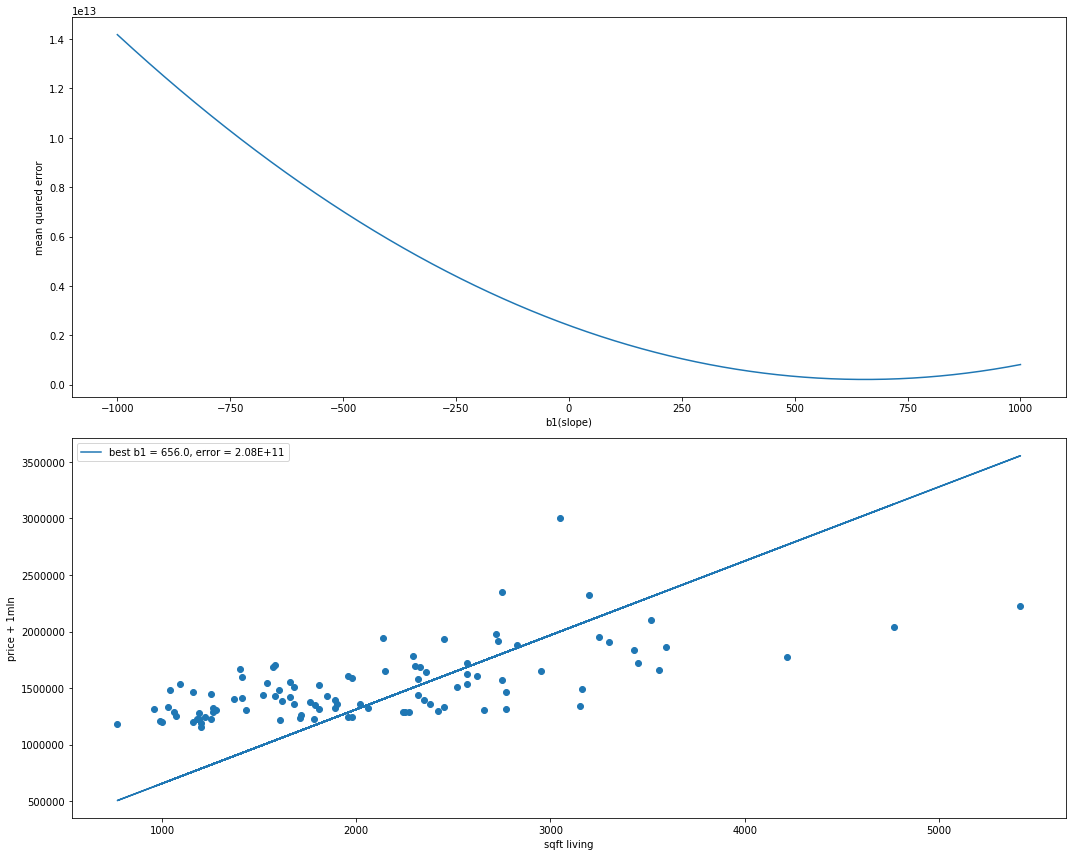

In [34]:
y2 = y + 1000000
b_closed2 = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y2)
b_opt2 = b_closed2[0][0]
#-------------------------------------------------------------------------------------------------------------
cost_arr2 = [cost(predict(b,X),y2) for b in b_arr]
#-------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(15,12))

ax1 = plt.subplot(2,1,1)
plt.plot(b_arr, cost_arr2)
plt.xlabel('b1(slope)')
plt.ylabel('mean quared error')

ax2 = plt.subplot(2,1,2)
price = house_df.price.values.reshape(-1,1)[:100]
plt.scatter(X, price+1000000)
ax2 = plt.subplot(2,1,2)
price = house_df.price.values.reshape(-1,1)[:100] + 1000000
y_new = [predict(i,b_opt2) for i in X] 
plt.plot(X, y_new)
ax2.legend(['best b1 = 656.0, error = 2.08E+11'])
plt.ylabel('price + 1mln')
plt.xlabel('sqft living')
plt.tight_layout()
plt.show() 

As we can see, for the best slope the error has grown almost by the factor of four. In addition we clearly see, that what limits us is indeed the constraint of all lines crossing point $(0,0)$.   

There are two basic solutions of this problem. One of them is centring of the data, that is substracting overall mean from all the values of given feature (or regressand).  

The other is adding bias term, which in this context (different than context discussed during the lectures!) may be understood as constant term in line equation. We simulate adding constant term to result of each prediction by appending artificial feature consisting of ones to **$X$** matrix and additional term to **$b$** vector.

## Exercise 2
a) Add bias column to the **$X$** matrix.  
b) Make the code below compatible with functions that you've created so far.

In [44]:
#a)
n,m = X.shape # for generality
X0 = np.ones((n,1))
Xbias = np.hstack((X,X0))
Xbias[1]

array([2.57e+03, 1.00e+00])

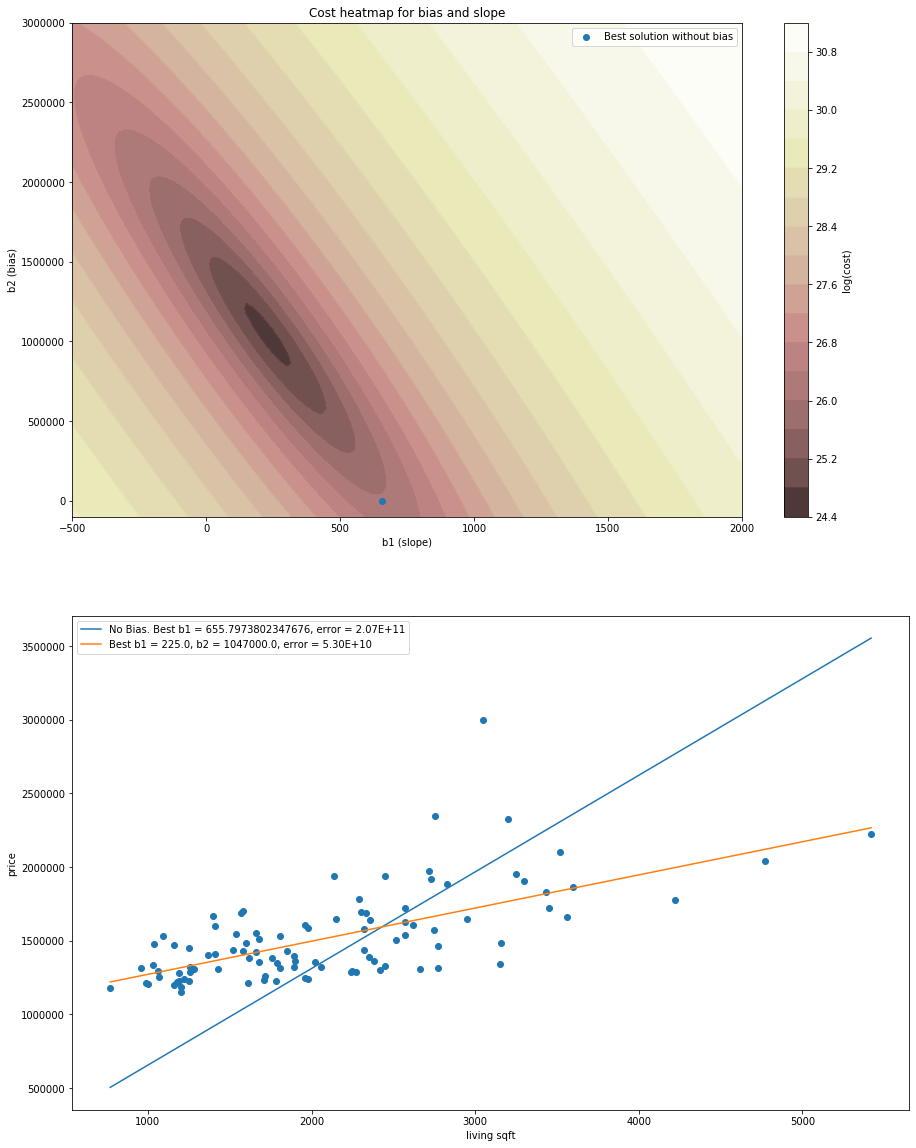

In [61]:
#b)
y_shifted = y+1e6

#No Bias Part
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]
cost_arr = [cost(predict(b, X[:,0]), y_shifted) for b in b_arr]
best_b1_nobias = b_arr[np.argmin(cost_arr)]


#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-500, 2000, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e5, 3e6, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), Xbias) , y_shifted) # nie mozna bylo tego
# po prostu meshgridem, poniewaz meshgrid to tylko szkietel, a to sa wartosci(miesnie), ktoer ten szkielet wypelniaja
        
#-------------------------------------------------------------------------------------------------------------
# Here I introduce a change:
b_closed = inv(Xbias.transpose().dot(Xbias)).dot(Xbias.transpose()).dot(y)
best_b1, best_b2 = b_closed[0], b_closed[1]
#-------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

# to przedstawia heatmap w zaleznlsci od bias i slope
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(b_opt2, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.scatter(X.T[0], y_shifted)
plt.xlabel("living sqft")
plt.ylabel("price")
#------------------------------------------------------------
# Sposob uzyskiwania gladkiej linii
x_model = np.linspace(np.min(X), np.max(X), 1000) 

y_model = b_opt2*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(b_opt2, cost_arr[np.argmin(cost_arr)]))
#--------------------------------------------------------------------------------------------------
best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1 *x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

**Adding bias improved error by three orders of magnitude. Not bad!**

# 3. Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$

It is important to remember, that bias column should not be standardize!

## Exercise 3
a) Implement function standardize(), which standardize the feature matrix and returns it together with two vectors containing original features' means and standard deviations.  
b) Implement function destandardize(), which restores the original data given standardized feature matrix X and vectors containing original features' means and standard deviations.  
c) Plot original $X,y$ data. Then plot it after standardization. Then plot it after destandardisation.

In [62]:
#a)
from statistics import stdev
def column(matrix, i):
    return [row[i] for row in matrix]
#-------------------------------------------------------------------------------------------------------------

def standardize(X): 
    '''
    Returns;
    ----------------
    1.Standarized features
    2.Original features means
    3.Standard deviations of features
    '''
    # 2. Original features means
    features_means = []
    for i in range(len(X[0])):
        features_means.append( np.mean(column(X,i)) )
    
    # 3. Standard deviations of features
    features_stdevs = []
    for i in range(len(X[0])):
        features_stdevs.append( np.std(column(X,i)) )
    
    # 1. Standdarized features
    stand_X = np.zeros(np.shape(X))
    for j in range(len(X[:,0])):
        
        for i in range(len(X[0])):
            stand_X[j][i] = (X[j][i]-features_means[i])/features_stdevs[i]
    
    return np.array(stand_X), np.array(features_means), np.array(features_stdevs)

#b)
def destandardize(X, means, sds):
    destand_X = np.zeros(np.shape(X))
    for j in range(len(X[:,0])):
        
        for i in range(len(X[0])):
            destand_X[j][i] = (X[j][i]*sds[i])+means[i]
    return destand_X


#short test:
W = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
standW, mean_f, stdev_f = standardize(W)
standardize(W)

#Hint: with np.mean and np.std first function is three lines long. The second is one-liner.

(array([[-1.34164079, -1.63299316, -1.18321596],
        [-0.4472136 ,  0.81649658, -0.50709255],
        [ 0.4472136 ,  0.        ,  0.16903085],
        [ 1.34164079,  0.81649658,  1.52127766]]),
 array([2.5 , 4.  , 4.75]),
 array([1.11803399, 1.22474487, 1.47901995]))

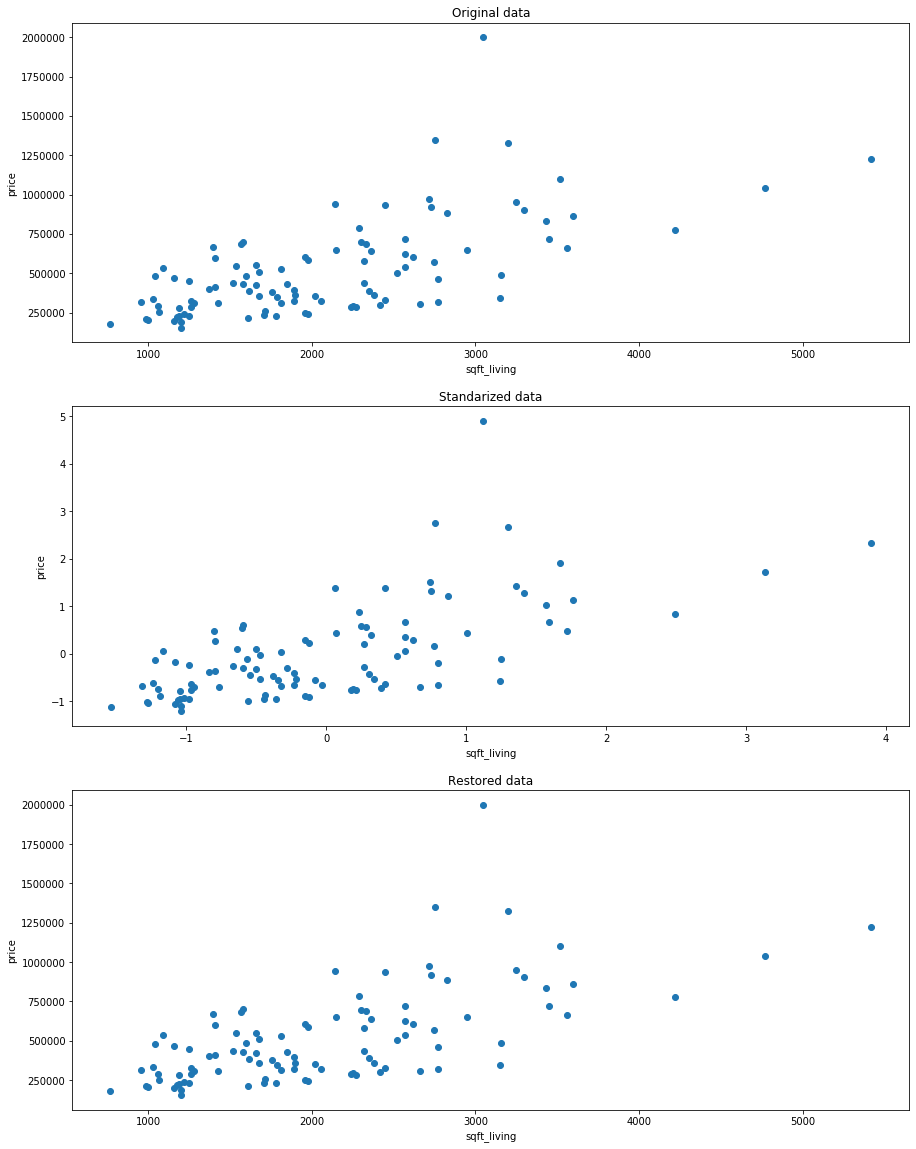

In [64]:
#c)
standX = standardize(X)[0]
#-------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(15,20)) 
        
plt.subplot(3,1,1)
# wszstko do plotu 1
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Original data')
plt.scatter(X,y)


#----------------------------------------------------------------------------------------------------------------
plt.subplot(3,1,2)
# wszystko do pltu 2
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Standarized data')
plt.scatter(standX, standardize(y)[0])


#----------------------------------------------------------------------------------------------------------------
plt.subplot(3,1,3)
# wszystko do pltu 3
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Restored data')
y_pred_stand = [predict(i,b_opt) for i in X]
plt.scatter(X,y)

#----------------------------------------------------------------------------------------------------------------
plt.show()


## 3. Gradient Descent Method

In previous examples we were determining the approximate value of optimal vector **$b$** by finding best arguments from pre-defined grid. This solution is neither fast nor precise. Although in theory it is possible to find vector **$b$** analytically, it requires inversing large matrices, as the close form for **$b$** is $b=(X^\mathsf{T}X)^{-1}X^\mathsf{T}y$.

The other approach is to find approximation of **$b$** is Gradient Descent Method. Let us recall that for function $f: \ R^n \to R$ a gradient 

$$\nabla f =  \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

is the direction of the biggest increase of $f$. Using linearity of derivative, $-\nabla f$ is the direction of the biggest decrease. Gradient Descent Method is based on iterative moving in the direction opposite to gradient, and by these means approaching the minimum.

#### GDM step by step:  
1. Choose starting point $x_{0}$ and parameters: *learning rate* and *precision*,
2. Update $x_{i+1} = x_{i} - \nabla f(x_{i})\cdot lr$, where $lr$ is learning rate parameter,
3. If $(|\nabla f(x_{i})| < precision)$, end. If not, go back to point 2.

One of many limitations of GMD may be knowledge of function's gradient. Luckily for us, it is quite easy in case of linear regression with mean square error cost function. We have

$$ \nabla f_{y}(b) = \nabla\dfrac{|Xb−y|^2}{n} = \dfrac{2X^\mathsf{T}(Xb−y)}{n}.  $$

## Exercise 4
a) Create functions: *gradient()* which computes gradient for linear regresion and *gradient_descent_step()* which returns new vector **b** being the result of one GDM step.  

b) Take **$X$** consisting of *sqft_living* together with bias column. Set **$y$** as price. Standardize both **$X$** (without bias) and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 2 \end{bmatrix}$**. Experiment with other *learning rates*.  

c) Take **$X$** consisting of *sqft_living* and *sqft_lot*. Set **$y$** as price. Standardize both **$X$** and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 1 \end{bmatrix}$**. Experiment with other *learning rates*.  

d) Try to redo above points without standarization. How can you explain such results?


In [66]:
#a)

def gradient(b, X, y):
    '''
    Computes gradient for linear regression.
    '''    
    return ( 2*np.dot(X.T, np.dot(X,b)-y) )/len(y) 

def gradient_descent_step(b, X, y, lr):
    '''
    Returns:
    -----------------------
    new_b - found by gradient method
    '''
    return b - gradient(b,X,y)*lr # to juz sie zajmuje kazdym z wymiarow

#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


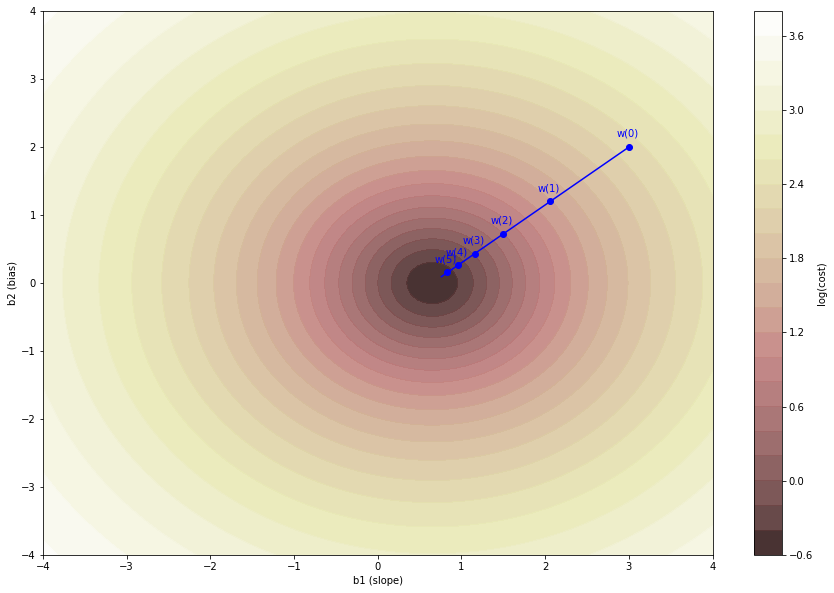

In [67]:
#b)
X_sqft_stand = standardize(X)[0]
n,m = X.shape # for generality
X0 = np.ones((n,1))
X_stand = np.hstack((X_sqft_stand,X0)) # dobrz
y_stand = standardize(y)[0]
#-------------------------------------------------------------------------------------------------------------
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]

plt.figure(figsize=(15, 10))
# przygotoanie do contourf plota
dens = 101
# wektory b, od ktorych bedzie zalezal cost
b0 = np.linspace(-4, 4, num = dens)
b1 = np.linspace(-4, 4, num = dens)
bx,by = np.meshgrid(b0,b1) #b1,b0

# Policz funkcje kosztu w zaleznosci od b
# Czy ta funkcja kosztu gdzies juz jest - funkcja kosztu jest zdef tylko raz na poczatku
cost_arr_2d = np.zeros((dens,dens))
for i in range(dens):
    for j in range(dens):
        cost_arr_2d[i,j] = cost(predict(np.array([[bx[i,j]], [by[i,j]]]), X_stand) , y_stand)

plt.contourf(bx, by, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink) # 20- density(breaks)
b_start = np.array([[3],[2]])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
for i in range(6):
    b1_new = b_start[0]
    b2_new = b_start[1] 
    plt.scatter(b1_new, b2_new , color = 'blue')
    plt.text(b1_new-0.15, b2_new+0.15, "w({})".format(i), fontsize=10 , color = 'blue')
    new_b = gradient_descent_step(b_start, X_stand, y_stand, 0.2)
    plt.plot([b_start[0],new_b[0]],[b_start[1],new_b[1]], color = 'blue')
    b_start = new_b
plt.xlabel('b1 (slope)')
plt.ylabel('b2 (bias)')
plt.show()

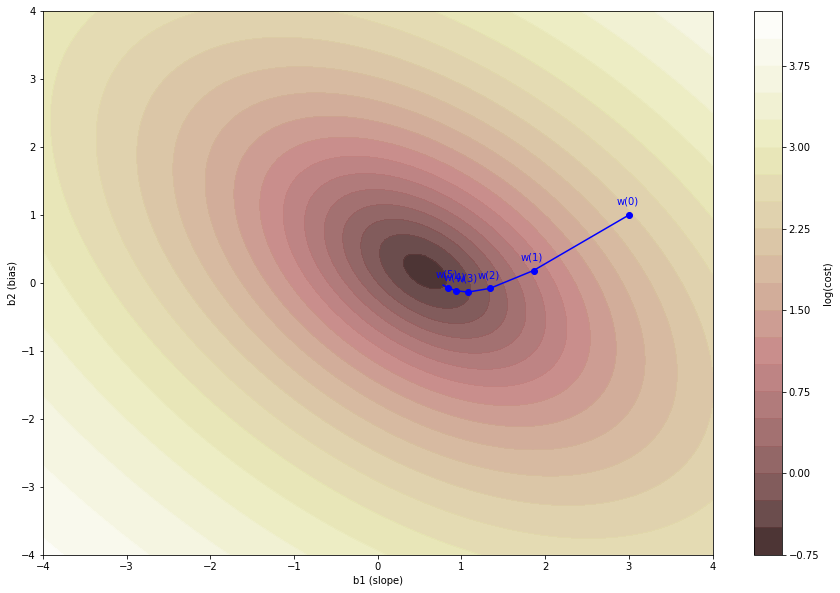

In [69]:
#c)
X_lot = house_df.sqft_lot.values.reshape(-1,1)[:100]
X_lot_stand = standardize(X_lot)[0]
X_stand2 = np.hstack((X_sqft_stand,X_lot_stand))
#-------------------------------------------------------------------------------------------------------------
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]

plt.figure(figsize=(15, 10))
# przygotoanie do contourf plota
dens = 101
# wektory b, od ktorych bedzie zalezal cost
b0 = np.linspace(-4, 4, num = dens)
b1 = np.linspace(-4, 4, num = dens)
bx,by = np.meshgrid(b0,b1) #b1,b0

# Policz funkcje kosztu w zaleznosci od b
# Czy ta funkcja kosztu gdzies juz jest - funkcja kosztu jest zdef tylko raz na poczatku
cost_arr_2d = np.zeros((dens,dens))
for i in range(dens):
    for j in range(dens):
        cost_arr_2d[i,j] = cost(predict(np.array([[bx[i,j]], [by[i,j]]]), X_stand2) , y_stand)

plt.contourf(bx, by, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink) # 20- density(breaks)
b_start = np.array([[3],[1]])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
for i in range(6):
    b1_new = b_start[0]
    b2_new = b_start[1] 
    plt.scatter(b1_new, b2_new , color = 'blue')
    plt.text(b1_new-0.15, b2_new+0.15, "w({})".format(i), fontsize=10, color = 'blue')
    new_b = gradient_descent_step(b_start, X_stand2, y_stand, 0.2)
    plt.plot([b_start[0],new_b[0]],[b_start[1],new_b[1]], color = 'blue')
    b_start = new_b
plt.xlabel('b1 (slope)')
plt.ylabel('b2 (bias)')
plt.show()

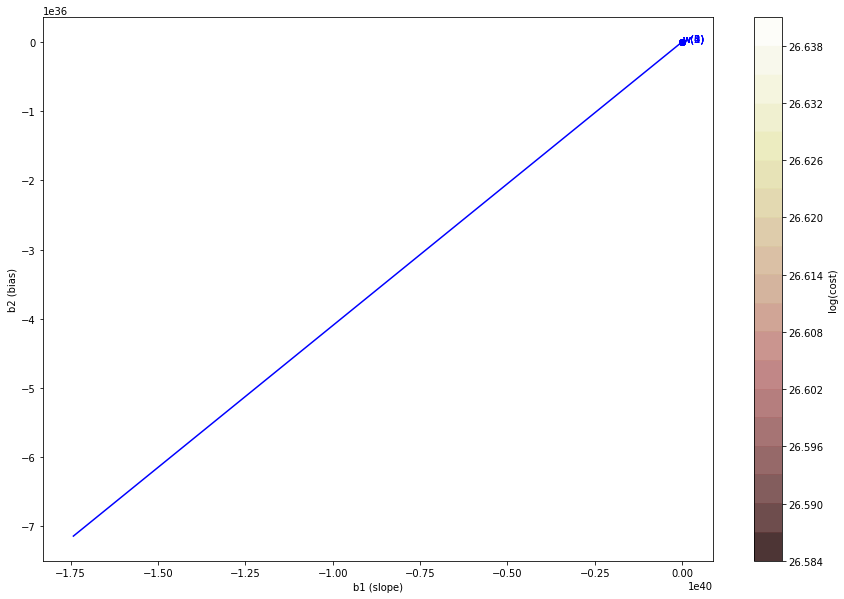

In [74]:
#d) Without standardization

#b)
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]

plt.figure(figsize=(15, 10))
# przygotoanie do contourf plota
dens = 101
# wektory b, od ktorych bedzie zalezal cost
b0 = np.linspace(-4, 4, num = dens)
b1 = np.linspace(-4, 4, num = dens)
bx,by = np.meshgrid(b0,b1) #b1,b0

# Policz funkcje kosztu w zaleznosci od b
# Czy ta funkcja kosztu gdzies juz jest - funkcja kosztu jest zdef tylko raz na poczatku
cost_arr_2d = np.zeros((dens,dens))
for i in range(dens):
    for j in range(dens):
        cost_arr_2d[i,j] = cost(predict(np.array([[bx[i,j]], [by[i,j]]]), Xbias),y)

plt.contourf(bx, by, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink) # 20- density(breaks)
b_start = np.array([[3],[2]])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
for i in range(6):
    b1_new = b_start[0]
    b2_new = b_start[1] 
    plt.scatter(b1_new, b2_new , color = 'blue')
    plt.text(b1_new-0.15, b2_new+0.15, "w({})".format(i), fontsize=10 , color = 'blue')
    new_b = gradient_descent_step(b_start, Xbias , y, 0.2)
    plt.plot([b_start[0],new_b[0]],[b_start[1],new_b[1]], color = 'blue')
    b_start = new_b
plt.xlabel('b1 (slope)')
plt.ylabel('b2 (bias)')
plt.show()


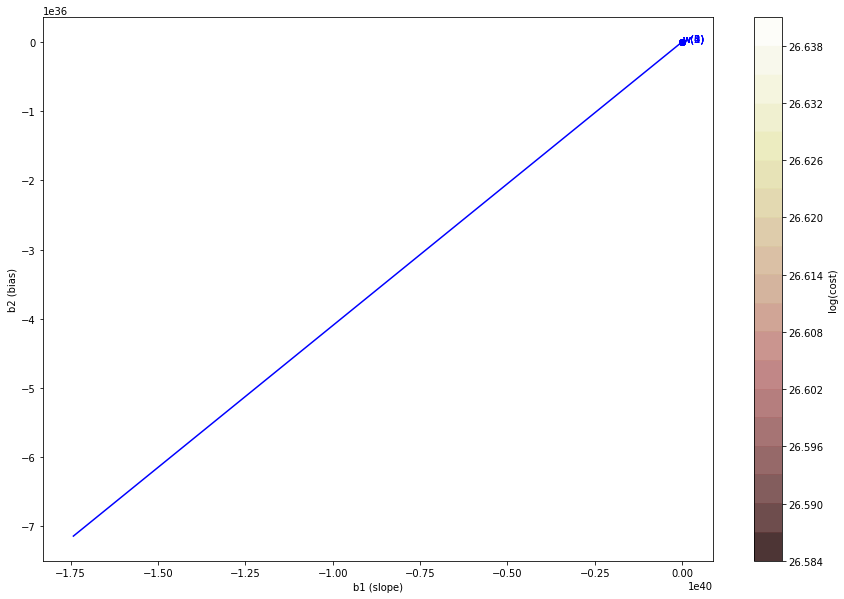

In [75]:
#d) Without standardization

#c)
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]

plt.figure(figsize=(15, 10))
# przygotoanie do contourf plota
dens = 101
# wektory b, od ktorych bedzie zalezal cost
b0 = np.linspace(-4, 4, num = dens)
b1 = np.linspace(-4, 4, num = dens)
bx,by = np.meshgrid(b0,b1) #b1,b0

# Policz funkcje kosztu w zaleznosci od b
# Czy ta funkcja kosztu gdzies juz jest - funkcja kosztu jest zdef tylko raz na poczatku
cost_arr_2d = np.zeros((dens,dens))
for i in range(dens):
    for j in range(dens):
        cost_arr_2d[i,j] = cost(predict(np.array([[bx[i,j]], [by[i,j]]]), Xbias) , y)

plt.contourf(bx, by, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink) # 20- density(breaks)
b_start = np.array([[3],[1]])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
for i in range(6):
    b1_new = b_start[0]
    b2_new = b_start[1] 
    plt.scatter(b1_new, b2_new , color = 'blue')
    plt.text(b1_new-0.15, b2_new+0.15, "w({})".format(i), fontsize=10, color = 'blue')
    new_b = gradient_descent_step(b_start, Xbias, y, 0.2)
    plt.plot([b_start[0],new_b[0]],[b_start[1],new_b[1]], color = 'blue')
    b_start = new_b
plt.xlabel('b1 (slope)')
plt.ylabel('b2 (bias)')
plt.show()

In [ ]:
# Without standardization results are uninformative, because we treat equally features which can possibly
# have different orders of magnitude.